In [1]:
from keras.models import load_model
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
from vdsr import VDSR
import matplotlib.pyplot as plt
import cv2

Using TensorFlow backend.


In [2]:
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
set_session(tf.Session(config=config))

In [3]:
vdsr = VDSR(model_path = None, save_path="./models/model.h5", num_layers=10)

In [10]:
vdsr.train(train_scales=[2], test_scales=[2], epochs=10)

Epoch 1/10
100/100 [==============================] - 13s 131ms/step - loss: 0.0029 - val_loss: 0.0032
Epoch 2/10
100/100 [==============================] - 14s 136ms/step - loss: 0.0028 - val_loss: 0.0024
Epoch 3/10
100/100 [==============================] - 14s 142ms/step - loss: 0.0029 - val_loss: 0.0036
Epoch 4/10
100/100 [==============================] - 16s 159ms/step - loss: 0.0026 - val_loss: 0.0027
Epoch 5/10
100/100 [==============================] - 12s 124ms/step - loss: 0.0030 - val_loss: 0.0021
Epoch 6/10
100/100 [==============================] - 12s 118ms/step - loss: 0.0034 - val_loss: 0.0053
Epoch 7/10
100/100 [==============================] - 15s 147ms/step - loss: 0.0032 - val_loss: 0.0028
Epoch 8/10
100/100 [==============================] - 13s 134ms/step - loss: 0.0024 - val_loss: 0.0024
Epoch 9/10
100/100 [==============================] - 15s 154ms/step - loss: 0.0027 - val_loss: 0.0026
Epoch 10/10
100/100 [==============================] - 15s 149ms/step - l

In [11]:
scale = 2
img_path = r"D:\ml\resources\datasets\faces\putin\Putin_0007.jpg"
#img_path = r"D:\ml\vdsr\data\test\Urban100\img090.jpg"
#img_path = r"D:\ml\resources\datasets\images.jpg"
hr = cv2.cvtColor(vdsr.predict_one(img_path, scale=scale, debug=False), cv2.COLOR_BGR2RGB)

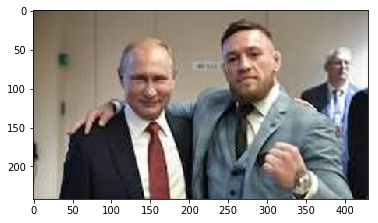

In [12]:
plt.imshow(hr)

In [8]:
ilr = cv2.cvtColor(cv2.resize(cv2.imread(img_path), (0,0), fx=scale, fy=scale), cv2.COLOR_BGR2RGB)

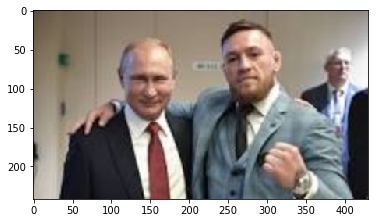

In [9]:
plt.imshow(ilr)

In [13]:
vdsr.model.save("./models/model.h5")